Here we will provide a very quick a simple demonstration that computation and theory don't always align. The idea is that the standard shiftmap ```2*x (mod 1)``` is known to be chaotic for all irrational initial conditions - but the computer (with floating point precision) never sees these - the map always behaves like it is heading toward a fixed points. *Chaos* can be generated computationally with more complicated maps - but is it ever really chaos? 

In [1]:
function shiftmap(x)
    return 2*x % 1   
end

shiftmap (generic function with 1 method)

In [2]:
shiftmap(10/3)

0.666666666666667

In [3]:
function iteratemap(x0,n::Int64, mapname=shiftmap)
    x=x0
    for i in 1:n
        x0 = mapname(x0)
        x = [x x0]
    end
    return x'
end


iteratemap (generic function with 2 methods)

In [4]:
x=iteratemap(1/3,100,shiftmap)

101×1 adjoint(::Matrix{Float64}) with eltype Float64:
 0.3333333333333333
 0.6666666666666666
 0.33333333333333326
 0.6666666666666665
 0.33333333333333304
 0.6666666666666661
 0.33333333333333215
 0.6666666666666643
 0.3333333333333286
 0.6666666666666572
 0.3333333333333144
 0.6666666666666288
 0.33333333333325754
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [5]:
using Plots

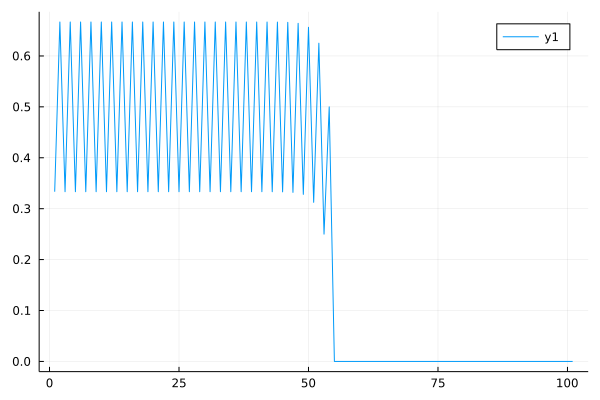

In [6]:
plot(x)

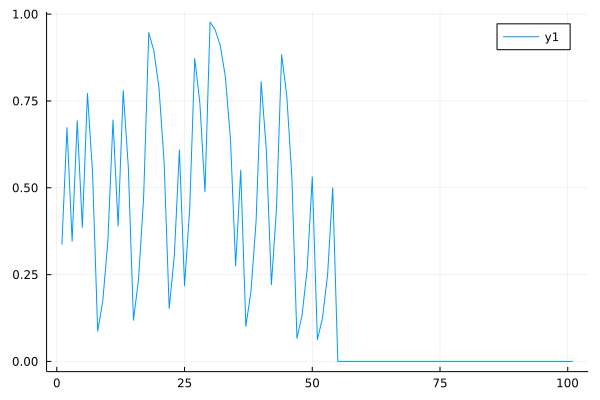

In [7]:
plot(iteratemap(1709/5077,100,shiftmap))

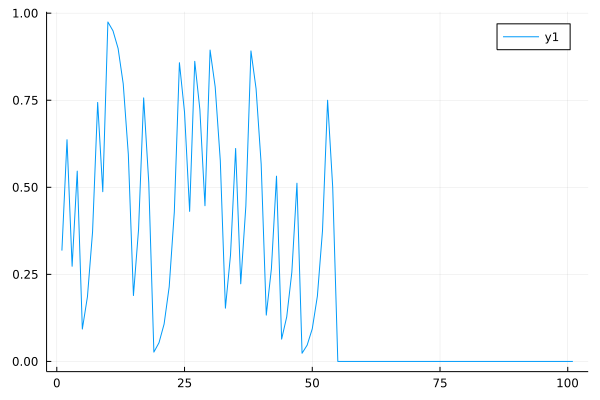

In [8]:
plot(iteratemap(1/π,100,shiftmap))

We see that with various rational and irrational initial conditions, in every case, the iterates of the shift-map converge to 0. The phenomenon is caused by the fact that the shift map is moving the less significant binary bits to positions of increasing significance, resulting, after about 64 operations in an exhaustion of the information in the original number. In contrast if we consider other relative simple maps that do not simply double stuff...

In [9]:
function logistic(x)
    return 4*x*(1-x)
end

logistic (generic function with 1 method)

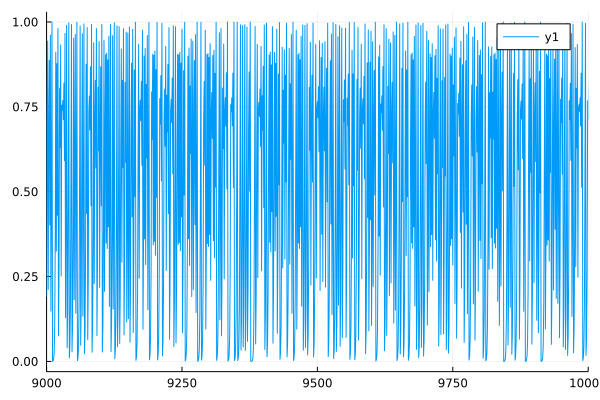

In [10]:
x=iteratemap(1/3,10000,logistic)
plot(x,xlims=(9000,10000))

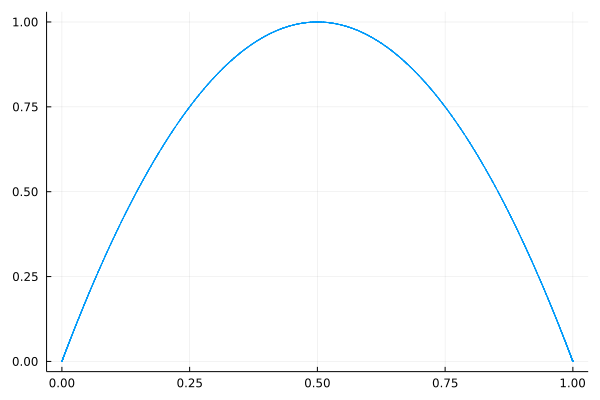

In [11]:
plot(x[1:end-1],x[2:end],seriestype = :scatter, markersize=0.1,legend=false)

In [12]:
function tinkerbell(u, p=[0.9, -0.60, 2.0, 0.5])
    xn,yn = u
    a,b,c,d = p
    
    xn1 = xn^2-yn^2+a*xn+b*yn
    yn1 = 2*xn*yn+c*xn+d*yn
    
    return [xn1, yn1]
end

tinkerbell (generic function with 2 methods)

In [13]:
x=iteratemap([-0.7, -0.6],10000,tinkerbell)

10001×2 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.7         -0.6
 -0.14        -0.86
 -0.33        -0.4692
 -0.126729    -0.584928
 -0.0891796   -0.397667
  0.00815252  -0.306265
  0.0973645   -0.141821
  0.162087     0.0962017
  0.105175     0.403462
 -0.299139     0.496949
 -0.724869    -0.647117
 -0.157437    -0.835147
 -0.313289    -0.469481
  ⋮           
 -0.459733     0.377327
 -0.571178    -1.07774
 -0.702698    -0.450062
 -0.0711625   -0.997911
 -0.456062    -0.499253
 -0.152165    -0.70637
 -0.188931    -0.442545
 -0.0646622   -0.431914
  0.0185841   -0.289424
  0.106959    -0.118301
  0.164689     0.129461
  0.0809061    0.43675

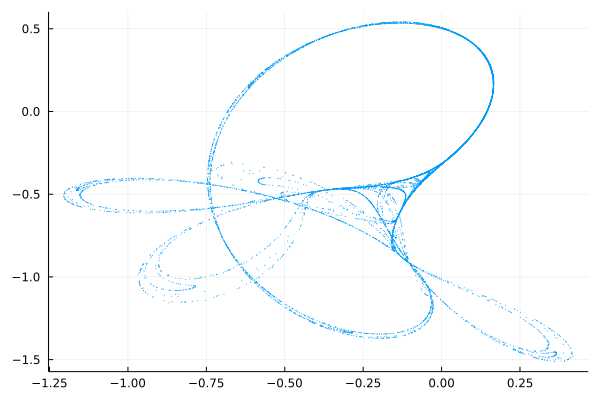

In [14]:
plot(x[:,1],x[:,2],seriestype = :scatter, markersize=0.2,legend=false)

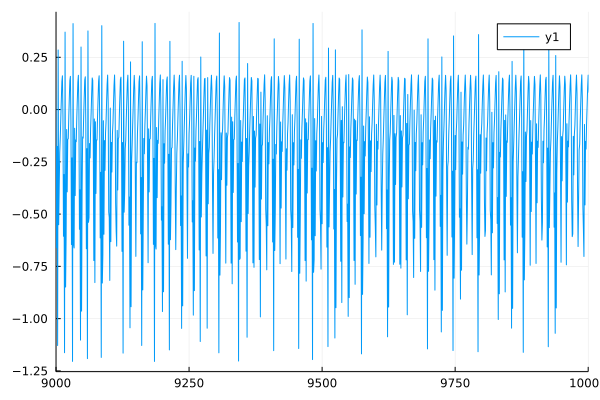

In [15]:
plot(x[:,1],xlims=(9000,10000))

## Michael Small, 15/3/22